<a href="https://colab.research.google.com/github/ArunRoshan143/CODEtech-intern/blob/main/PREDICTIVE_MODELING_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# predictive analysis --    uses steaming and historical data to analyse future data.
# step1:Data exploration -- collect the data. figure out data wht we r dealing with and columns,features,datatypes,wht kind of data we r dealing.
# step2:Data cleaning --    find redundencies,white spaces, repeated data which is not uses for analysis(missing, null values)
# step3:modelling --        modell with the data(linear regression)
# step4:perforamce alaysis -check accuracy for performam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [4]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

In [5]:
print("First few rows of the dataset:")
print(data.head())

# Display basic statistics of the dataset
print("\nDataset description:")
print(data.describe())

First few rows of the dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512

Dataset description:
              Open         High          Low        Close    Adj Close  \
count  4858.000000  4858.000000  4858.000000  4858.000000  4858.000000   
mean     41.477174    41.917059    41.055491    41.494404    41.494404   
std      38.590695    39.031758    38.193016    38.618107    38.618107   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.846597    12.954195    12.712414    12.834642    12.834642   
50%      26.499958    26.728268    26.289323   

In [6]:
print(data.isnull())

       Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
4853  False  False  False  False  False      False   False
4854  False  False  False  False  False      False   False
4855  False  False  False  False  False      False   False
4856  False  False  False  False  False      False   False
4857  False  False  False  False  False      False   False

[4858 rows x 7 columns]


In [7]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
X = data[['Open']]
y = data['Close']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [12]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.7969515093239589
R-squared: 0.9994912852305217


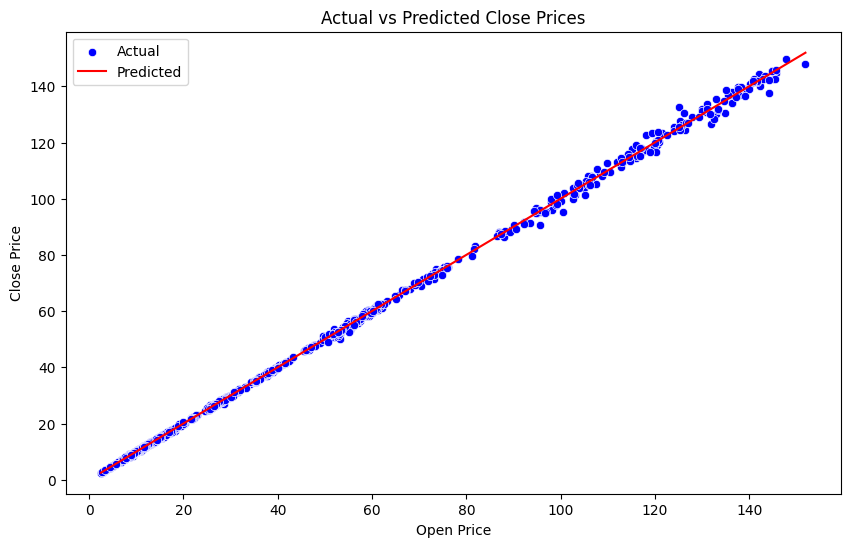

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Open'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['Open'], y=y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()


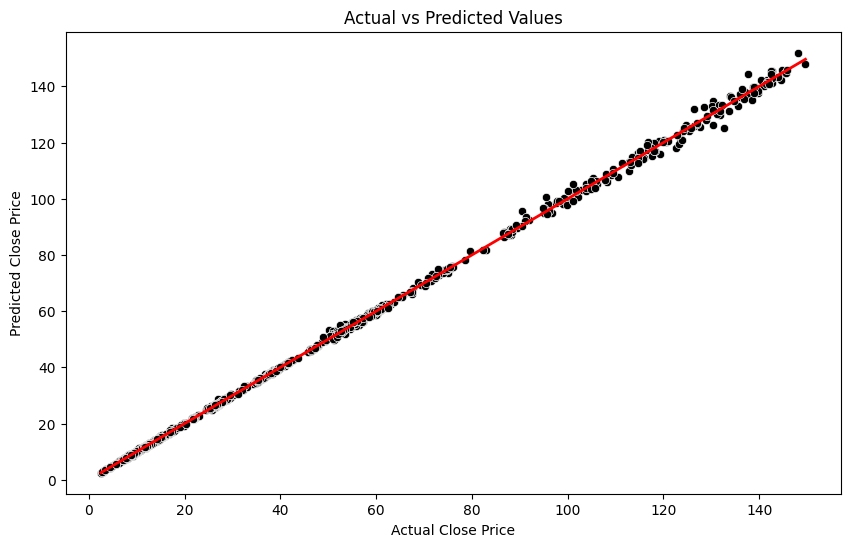

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.show()